In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Data Loading

In [46]:
df = pd.read_csv('breast-cancer-datasets.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Eksplorasi Data

In [47]:
print("Total rows : ", df.shape[0])
print("Total cols : ", df.shape[1])

Total rows :  569
Total cols :  33


Terdapat 569 observasi dan 33 kolom pada dataset:
- `id`: ID number
- `diagnosis`: golongan kanker apakah Malignant (ganas) atau Benign (jinak)

Karakteristik dari inti sel:
- `radius` (jarak dari titik pusat ke titik perimeter)
- `texture` (standard deviation dari intensitas skala keabuan pada komponen-komponen piksel citra)
- `perimeter` (garis keliling inti sel)
- `area` (luas inti sel)
- `smoothness` (perbedaan antara panjang jari-jari dan rata-rata garis di sekitarnya)
- `compactness` (kepadatan inti sel -> perimeter^2 / area - 1.0)
- `concavity` (kecengkungan kurva pada batas inti sel)
- `concave points` (titik kecengkungan kurva pada batas inti sel)
- `symmetry` (selisih garis tegak lurus sumbu utama menuju batas inti sel di kedua arah)
- `fractal dimension` (ukuran numerik/dimensi fraktal dari sel -> "coastline approximation" - 1)

Pengukuran:
- `mean`: rata-rata
- `se`: standard error
- `worst`: terbesar

### Memeriksa Missing Values

In [48]:
print("Total Missing values : ", df.isnull().sum().sum())

Total Missing values :  569


Terdapat `569` Data yang hilang, kita perlu mengetahui dari kolom apa saja yang terdapat missing values

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- Ternyata terdapat satu feature yang isinya tidak ada, kita dapat menghapusnya.
- selain itu kita dapat menghapus feature ID karena tidak berpengaruh terhapat prediksi 
- Sebelum itu kita buat dataframe baru untuk membackup data 

In [50]:
df_backup = df.copy(deep=True)

### Menghapus Kolom ID dan Unnamed: 32

In [51]:
df.drop(columns=['id','Unnamed: 32'], inplace=True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Visualisasi Data

F:\1. BELAJAR-MANDIRI\Belajar-Bahasa-Pemrograman\Latihan-Python\Portofolio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


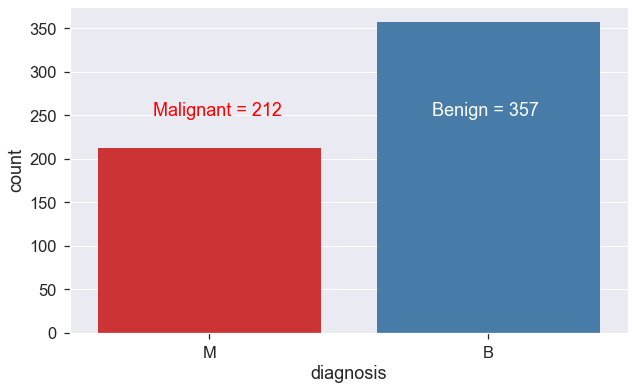

In [52]:
plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1.5)
sns.countplot('diagnosis',data=df, palette="Set1")
plt.annotate('Malignant = '+str(df['diagnosis'][df['diagnosis']=='M'].count()), xy=(-0.2, 250), xytext=(-0.2, 250), size=18, color='r')
plt.annotate('Benign = '+str(df['diagnosis'][df['diagnosis']=='B'].count()), xy=(0.8, 250), xytext=(0.8, 250), size=18, color='w');

# Feature Selection

- Untuk mengetahui kolom mana yang akan digunakan, kita cek korelasinya terhadapt variabel target kita yakni  diagnosis
- Sebelum itu kita harus lakukan encoding pada variable target kita untuk mengubahnya menjadi numerik

#### Label Encoding feature diagnosis

In [53]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['diagnosis'] = LE.fit_transform(df['diagnosis'])
df['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [54]:
df['diagnosis'].unique()

array([1, 0])

In [55]:
LE.classes_

array(['B', 'M'], dtype=object)

- Encoding disini, 1 berarti B dan 0 berarti M

In [56]:
corr = df.corr()['diagnosis']

In [57]:
corr_strong = corr[corr >= 0.5]
corr_weak = corr[corr < 0.5]

In [58]:
corr_strong.to_frame()

,diagnosis
diagnosis,1.000000
radius_mean,0.730029
perimeter_mean,0.742636
area_mean,0.708984
compactness_mean,0.596534
concavity_mean,0.696360
concave points_mean,0.776614
radius_se,0.567134
perimeter_se,0.556141
area_se,0.548236


In [59]:
corr_weak.to_frame()

,diagnosis
texture_mean,0.415185
smoothness_mean,0.358560
symmetry_mean,0.330499
fractal_dimension_mean,-0.012838
texture_se,-0.008303
smoothness_se,-0.067016
compactness_se,0.292999
concavity_se,0.253730
concave points_se,0.408042
symmetry_se,-0.006522


- Kita abaikan diagnosis yang berkorelasi 1
- Jika dilihat banyak dari feature SE yang berkorelasi lemah dengan feature diagnosis

# Data Prepocessing

- Sebelum Membuat Model Kita perlu melihat skla dari data 
- Sebelum itu kita pisahkan terlebih dahulu feature yang kita gunakan untuk membuat model
- feature yang kita gunakan tentunya yang berkorelasi kuat

In [71]:
corr_strong = corr_strong[1:]

In [75]:
feature = df[corr_strong.keys().to_list()]
target = df['diagnosis']

In [76]:
feature.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625


- Jika kita perhatikan skala dari feature kita tidak seimbang, seperti area_mean yang skalanya ribuan sedangkan concavity_mean skalanya nol koma
- Untuk itu kita perlu lakukan normalisasi 

Disini saya akan menggunakan minMaxScaler sebagai metode normalisasi

In [77]:
from sklearn.preprocessing import MinMaxScaler
Min_Max_Scaler = MinMaxScaler()

In [80]:
for col in feature.columns:
    feature[col] = Min_Max_Scaler.fit_transform(feature[[col]])

<ipython-input-80-9cff451bd3cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[col] = Min_Max_Scaler.fit_transform(feature[[col]])
<ipython-input-80-9cff451bd3cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[col] = Min_Max_Scaler.fit_transform(feature[[col]])
<ipython-input-80-9cff451bd3cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [81]:
feature.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,0.521037,0.545989,0.363733,0.792037,0.703140,0.731113,0.356147,0.369034,0.273811,0.620776,0.668310,0.450698,0.619292,0.568610,0.912027
1,0.643144,0.615783,0.501591,0.181768,0.203608,0.348757,0.156437,0.124440,0.125660,0.606901,0.539818,0.435214,0.154563,0.192971,0.639175
2,0.601496,0.595743,0.449417,0.431017,0.462512,0.635686,0.229622,0.180370,0.162922,0.556386,0.508442,0.374508,0.385375,0.359744,0.835052
3,0.210090,0.233501,0.102906,0.811361,0.565604,0.522863,0.139091,0.126655,0.038155,0.248310,0.241347,0.094008,0.814012,0.548642,0.884880
4,0.629893,0.630986,0.489290,0.347893,0.463918,0.518390,0.233822,0.220563,0.163688,0.519744,0.506948,0.341575,0.172415,0.319489,0.558419


Sekarang skala sudah seimbang

#### Memisahkan data training dan testing

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, train_size=0.8, random_state=42)

# Membuat model

# 1. Random Forest 

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf_clf = RandomForestClassifier()

In [87]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [93]:
cv_scores = cross_val_score(rf_clf, feature, target, cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)), 
      "\nStandard deviation: {}".format(np.std(cv_scores)))

Average 5-Fold CV Score: 0.9473063188945815 
Standard deviation: 0.02214262003114482


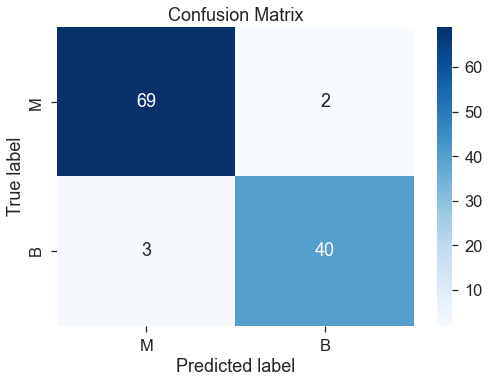

In [94]:
ConfMatrix = confusion_matrix(y_test,rf_clf.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['M', 'B'], yticklabels = ['M', 'B'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");
plt.savefig('rf.png')

# Confusion Matrix

Target class:
- Positive (1): Benign
- Negative (0): Malignant

Confusion Matrix :
![](ConfusionMatrix.png)

Misalkan 0 untuk Label Negatif dan 1 untuk Label Positif. Confusion Matrix punya empat istilah:
1. True Negative (TN): Model memprediksi data ada di kelas Negatif dan yang sebenarnya data memang ada di kelas Negatif.
2. True Postive (TP): Model memprediksi data ada di kelas Positif dan yang sebenarnya data memang ada di kelas Positif.
3. False Negative (FN): Model memprediksi data ada di kelas Negatif, namun yang sebenarnya data ada di kelas Positif.
4. False Positive (FP): Model memprediksi data ada di kelas Positif, namun yang sebenarnya data ada di kelas Negatif.

$Precision = \frac{TP}{TP+FP}$

$Recall = \frac{TP}{TP+FN}$

Evaluation metric:
- Recall: berapa persen pasien dengan Malignant yang dapat tertangkap oleh model?
- Precision: dari pasien yang diprediksi Malignant, berapa persen yang benar-benar Malignant?
- F1 score: perbandingan rata-rata Recall dan Precision yang dibobotkan. $F1 = 2 \times \frac{Recall \times Precision}{Recall+Precision}$

Types of error:
- False Positive (FP): Pasien yang sebenarnya mengidap kanker jinak (Benign), oleh model diprediksi sebagai Malignant. Hal ini dapat menimbulkan rasa panik pada pasien, namun pasien tersebut akan mendapatkan konsultasi atau treatment lanjutan sebagai tindakan preventif, sehingga keselamatan pasien lebih terjamin.
- False Negative (FN): Pasien yang sebenarnya mengidap kanker ganas (Malignant), oleh model diprediksi sebagai Benign. Hal ini dapat membahayakan keselamatan pasien karena kanker tidak ditangani dengan serius.

Ingin meminimalisir kasus False Negative (FN), sehingga diharapkan Recall yang tinggi. Precision juga diharapkan untuk tetap tinggi, namun bisa jadi prioritas kedua. Apabila kedua metric sama-sama ingin diprioritaskan, gunakan F1-score.

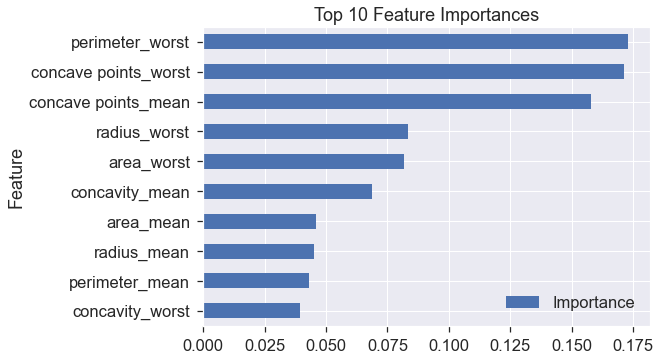

In [95]:
var_imp = pd.DataFrame({
    'Feature': feature.columns,
    'Importance': rf_clf.feature_importances_
}).set_index('Feature')

var_imp.sort_values('Importance', ascending=False).head(10).sort_values('Importance').plot.barh(title='Top 10 Feature Importances')
plt.show()

# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [105]:
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train)
y_pred = Logistic_Regression.predict(X_test)

In [106]:
from sklearn import metrics

In [107]:
metrics.accuracy_score(y_test, y_pred)

0.956140350877193

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



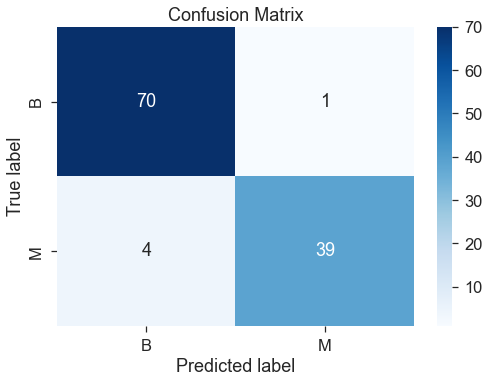

In [108]:
print(classification_report(y_test, y_pred))

ConfMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");
plt.savefig('logreg.png')